# Stock Sterling Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'GS' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def sterling_ratio(stocks_returns, market_returns):
    mrk_rate_ret = (market_returns[-1] - market_returns[0])/ market_returns[0]
    m = np.matrix([stocks_returns, market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    er = rf + beta*(mrk_rate_ret-rf)
    average_dd = 1.0 - (stocks_returns / np.maximum.accumulate(stocks_returns)).mean()
    sterling_r = (er - rf) / average_dd
    return sterling_r

Text(0, 0.5, 'Sterling Ratio')

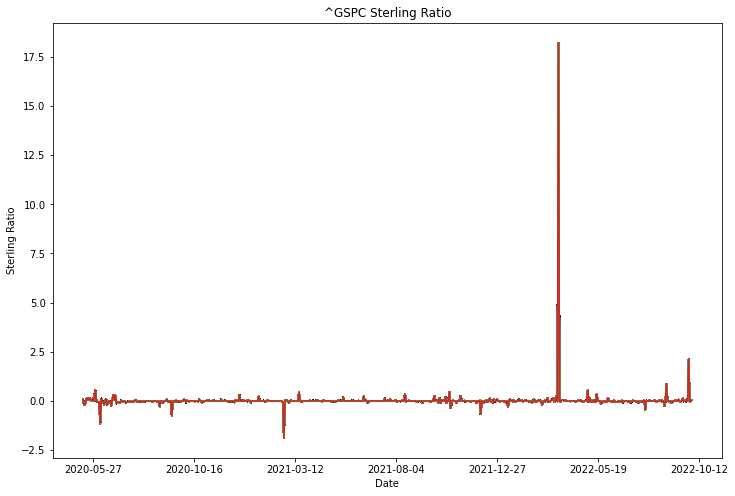

In [7]:
# Compute the running Sterling Ratio
running = [sterling_ratio(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Sterling Ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol1 + ' Sterling Ratio')
plt.xlabel('Date')
plt.ylabel('Sterling Ratio')

In [8]:
SR = sterling_ratio(stocks_returns, market_returns)
SR

Date
2020-01-03 00:00:00-05:00   -0.010218
2020-01-06 00:00:00-05:00   -0.010216
2020-01-07 00:00:00-05:00   -0.010218
2020-01-08 00:00:00-05:00   -0.010222
2020-01-09 00:00:00-05:00   -0.010220
                               ...   
2023-02-22 00:00:00-05:00   -0.010224
2023-02-23 00:00:00-05:00   -0.010224
2023-02-24 00:00:00-05:00   -0.010220
2023-02-27 00:00:00-05:00   -0.010220
2023-02-28 00:00:00-05:00   -0.010220
Name: Adj Close, Length: 794, dtype: float64

Text(0, 0.5, 'Sterling Ratio')

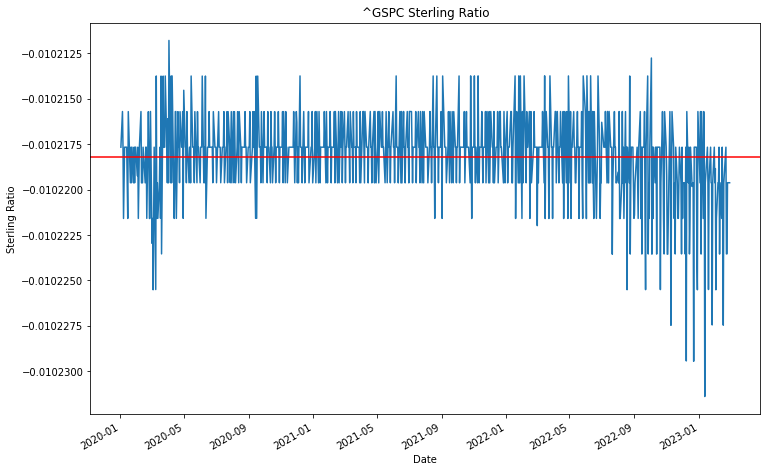

In [9]:
SR.plot(figsize=(12,8), title = symbol1 + ' Sterling Ratio')
plt.axhline(y=SR.mean(), color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sterling Ratio')